In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


def run():
    # generate synthetic data
    n = 1
    mu = 0
    std = 1  # standard deviation
    # np.random.seed(0)
    x = np.random.normal(loc=mu, scale=std, size=(n, 1))

    # we want to the following hypotheses
    # H_0: mu_2 = 0   vs.   H_1: mu_2 != 0

    # Construct test-statistic
    T_obs = x[0][0] # -> chon sample x dau tien, kiem dinh feature dau tien

    # Compute two-sided p-value
    abs_T_obs = np.abs(T_obs)
    p_value = 2 * (min(1 - stats.norm.cdf(abs_T_obs, loc=0, scale=1),stats.norm.cdf(abs_T_obs, loc=0, scale=1) ))  # two-sided p-value

    return p_value

In [3]:
# Exercise 1: Your code to compute p_value
p_value = run()
print("p_value: ", p_value)

p_value:  0.24991752537837186


In [4]:
# Exercise 2: Your code to compute the false positive rate with 1000 iterations
max_iteration = 10000
alphas = [0.05, 0.1, 0.2, 0.5]  # significance level
p_values = []
false_positives = 0

for alpha in alphas:
    print(f"alpha = {alpha}")
    false_positives = 0
    for _ in range(max_iteration):
        p = run()
        p_values.append(p)
        if p < alpha:  # reject H_0 
            false_positives += 1
    false_positive_rate = false_positives / max_iteration
    print(
        f"\tExercise 2: False Positive Rate = {false_positive_rate:.4f}"
    )

alpha = 0.05
	Exercise 2: False Positive Rate = 0.0504
alpha = 0.1
	Exercise 2: False Positive Rate = 0.0939
alpha = 0.2
	Exercise 2: False Positive Rate = 0.1959
alpha = 0.5
	Exercise 2: False Positive Rate = 0.5014


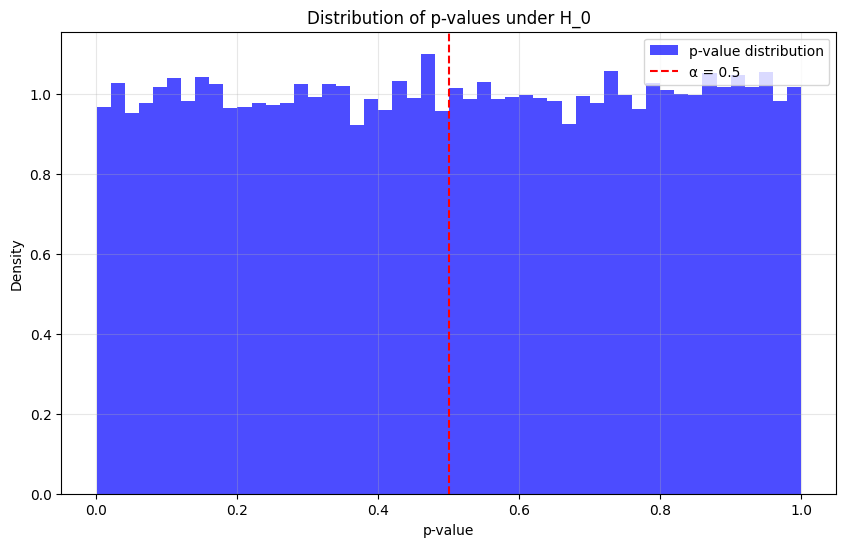

In [5]:
# Exercise 3: Plot the distribution of the p_values
plt.figure(figsize=(10, 6))
plt.hist(
    p_values,
    bins=50,
    density=True,
    alpha=0.7,
    color="blue",
    label="p-value distribution",
)
plt.axvline(x=alpha, color="red", linestyle="--", label=f"α = {alpha}")
plt.title("Distribution of p-values under H_0")
plt.xlabel("p-value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()